In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extraction

In [74]:
df = pd.read_csv("train.csv", index_col=0)
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [75]:
print(len(df))
print(f"The data is representing {int(len(df) / 365)} years")
df.describe()

2190
The data is representing 6 years


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


# Data Analysis x Transformation

In [76]:
df['year'] = 0
for i in range(6):
    df.loc[i*365:(i+1)*365, 'year'] = i
df['year'].value_counts()

year
0    365
1    365
2    365
3    365
4    365
5    365
Name: count, dtype: int64

In [77]:
gb = df.groupby(['year', 'day']).agg(
    avg_temp = ('temparature', 'mean')
).reset_index()
gb

,year,day,avg_temp
0,0,1,20.6
1,0,2,16.9
2,0,3,16.1
3,0,4,17.8
4,0,5,18.4
...,...,...,...
2151,5,361,20.6
2152,5,362,17.3
2153,5,363,16.3
2154,5,364,15.2


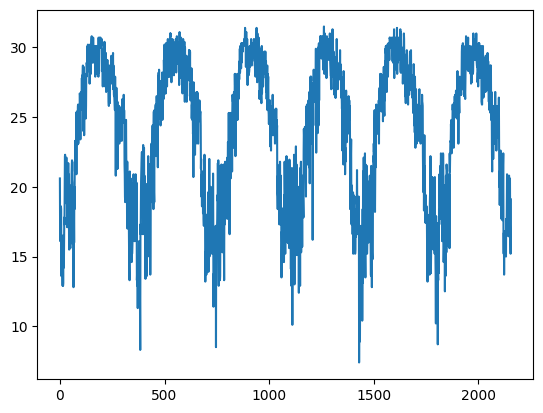

In [78]:
plt.plot(gb.index, gb['avg_temp'])

not aberrant to suppose that the day 1 correspond to the first of january

In [79]:
fake_date_range = pd.date_range(start="01/01/2017", end="30-12-2022")

In [80]:
df['date'] = fake_date_range
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 0 # Winter
    elif month in [3, 4, 5]:
        return 1 # Spring
    elif month in [6, 7, 8]:
        return 2 # Summer
    elif month in [9, 10, 11]:
        return 3 # Autumn
    else:
        return 'Unknown'

# Appliquer la fonction pour obtenir la saison
df['season'] = df['month'].apply(get_season)

In [81]:
df.head(2)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,year,date,month,season
id,,,,,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,2017,2017-01-01,1,0
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,2017,2017-01-02,1,0


In [82]:
df['sunshine'].describe()

count    2190.000000
mean        3.744429
std         3.626327
min         0.000000
25%         0.400000
50%         2.400000
75%         6.800000
max        12.100000
Name: sunshine, dtype: float64

In [83]:
df['sunshine'].corr(df['rainfall'])

-0.5552869202009947

In [97]:
df['sunshine'] =  df['sunshine'].astype(int)

df['sunshine'].unique()

array([ 1,  0,  8,  3,  7,  6,  2,  9, 10,  4, 11,  5, 12])

In [98]:
df.groupby('sunshine')['rainfall'].mean().to_frame()

,rainfall
sunshine,
0,0.950867
1,0.913725
2,0.873469
3,0.775862
4,0.857143
5,0.750000
6,0.722973
7,0.596774
8,0.483871
